## Basics

In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import xtrack as xt

## Introduction

In this example we use the Proton Ion Medical Machine (PIMM) synchrotron designed at CERN by the TERA foundation and used as base design at CNAO (Italy) and MEDAUSTRON (Austria). Reference: http://cds.cern.ch/record/385378

## Import MAD-X sequence to Xsuite

In [3]:
# Read MAD-X sequence from file (using cpymad)
from cpymad.madx import Madx
mad = Madx(stdout=False)
mad.call('PIMM.seq')
mad.beam()
mad.use('pimms')

In [4]:
# Import in Xsuite
line = xt.Line.from_madx_sequence(mad.sequence.pimms,
                                  deferred_expressions=True)

Converting sequence "pimms":   0%|          | 0/98 [00:00<?, ?it/s]

In [5]:
# Choose bend model appropriate for small rings (similar to PTC, MAD-NG)
line.configure_bend_model(edge='full', core='adaptive', num_multipole_kicks=5)

## Define reference particle

In [6]:
line.particle_ref = xt.Particles(q0=1, mass0=xt.PROTON_MASS_EV,
                                 kinetic_energy0=200e6) # eV

## Inspect machine layout

In [7]:
# Compute survey
sv = line.survey()

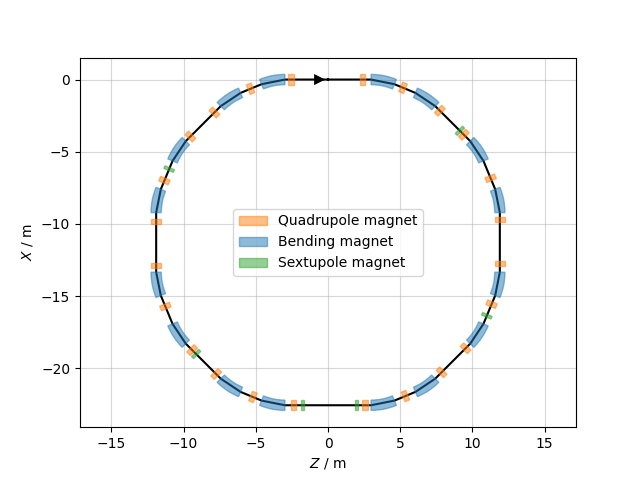

In [8]:
# Plot ring geometry using Xplt
sv.plot()

### Table with machine elements

In [9]:
# To extract a table with all elements in the lattice
tt = line.get_table()

In [10]:
# Inspect first ten elements
tt.rows[:10].show(cols=['element_type', 's_start', 's_center'])

name        element_type       s_start      s_center
pimms$start Marker                   0             0
extr_septum Marker                   0             0
drift_0     Drift                    0       1.10625
qfa.1       Quadrupole          2.2125        2.3875
drift_1     Drift               2.5625       2.77225
mb          Bend                 2.982        3.8125
drift_2     Drift                4.643       4.88025
qd.1        Quadrupole          5.1175        5.2925
drift_3     Drift               5.4675       5.84225
mb:0        Bend                 6.217        7.0475


In [11]:
# Inspect all quadrupoles
ttquad = tt.rows[tt.element_type=='Quadrupole']
ttquad.rows[:10].show(cols=['element_type', 's_start', 's_center'])

name  element_type       s_start      s_center
qfa.1 Quadrupole          2.2125        2.3875
qd.1  Quadrupole          5.1175        5.2925
qfa.2 Quadrupole          8.1525        8.3275
qfb.1 Quadrupole         10.5025       10.6775
qd.2  Quadrupole         14.0875       14.2625
qfb.2 Quadrupole         17.0225       17.1975
qfb.3 Quadrupole         20.0725       20.2475
qd.3  Quadrupole         23.0075       23.1825
qfb.4 Quadrupole         26.5925       26.7675
qfa.3 Quadrupole         28.9425       29.1175


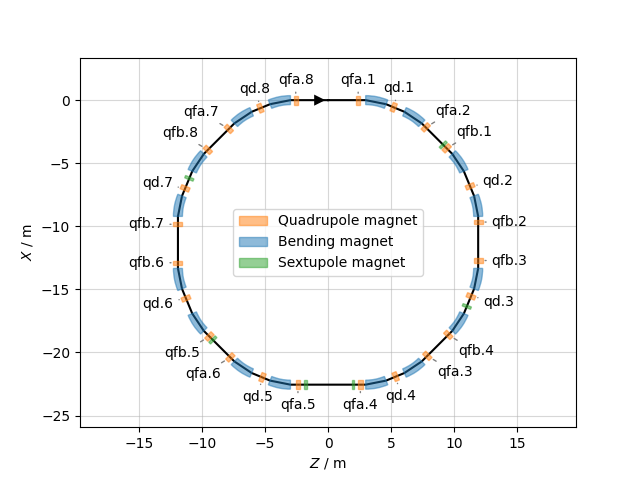

In [12]:
# Label all quadrupoles in survey plot to identify three quadrupole families
# (qfa, qfb, qd)
sv.plot(labels=ttquad.name)

### Inspect one element

In [13]:
line['qfa.1']

View of Quadrupole(k1=0, k1s=0, length=0.35, num_multipole_kicks=5, _order=5, inv_factorial_order=0.00833, knl=array([0., 0., 0., 0., 0., 0.]), ksl=array([0., 0., 0., 0., 0., 0.]), edge_entry_active=0, edge_exit_active=0, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0)

### Inspect knobs controlling a element

In [14]:
line.info('qfa.2')

Element of type:  Quadrupole
name                value                expr                
k1                  0.0                  (1.0 * vars['kqfa'])
k1s                 0.0                  None                
length              0.35                 None                
num_multipole_kicks 5                    None                
order               5                    None                
inv_factorial_order 0.008333333333333333 None                
knl                 [0. 0. 0. 0. 0. 0.]  None                
ksl                 [0. 0. 0. 0. 0. 0.]  None                
edge_entry_active   0                    None                
edge_exit_active    0                    None                
_sin_rot_s          -999.0               None                
_cos_rot_s          -999.0               None                
_shift_x            0.0                  None                
_shift_y            0.0                  None                
_shift_s            0.0                  

### Get all elements controlled by one knob

In [15]:
line.info('kqfa')

#  vars['kqfa']._get_value()
   vars['kqfa'] = 0.0

#  vars['kqfa']._expr is None

#  vars['kqfa']._find_dependant_targets()
   element_refs['qfa.8'].k1
   element_refs['qfa.7'].k1
   element_refs['qfa.6'].k1
   element_refs['qfa.5'].k1
   element_refs['qfa.4'].k1
   element_refs['qfa.3'].k1
   element_refs['qfa.2'].k1
   element_refs['qfa.1'].k1



# Match the optics

We start by controlling all focusing quadrupoles with the same strength:

In [16]:
line['kqf_common'] = 0
line['kqfa'] = 'kqf_common'
line['kqfb'] = 'kqf_common'

Put a small strength all quads to get a stable lattice:

In [17]:
line['kqf_common'] = 2e-2
line['kqd'] = -2e-2

In [18]:
line.info('kqf_common')

#  vars['kqf_common']._get_value()
   vars['kqf_common'] = 0.02

#  vars['kqf_common']._expr is None

#  vars['kqf_common']._find_dependant_targets()
   vars['kqfb']
   element_refs['qfb.8'].k1
   element_refs['qfb.7'].k1
   element_refs['qfb.6'].k1
   element_refs['qfb.5'].k1
   element_refs['qfb.4'].k1
   element_refs['qfb.3'].k1
   element_refs['qfb.2'].k1
   element_refs['qfb.1'].k1
   vars['kqfa']
   element_refs['qfa.8'].k1
   element_refs['qfa.7'].k1
   element_refs['qfa.6'].k1
   element_refs['qfa.5'].k1
   element_refs['qfa.4'].k1
   element_refs['qfa.3'].k1
   ... set _info(limit=None) to get all lines



First twiss:

In [19]:
tw0 = line.twiss4d()

# Tunes
tw0.qx, tw0.qy

(0.33043572461985604, 1.6932434815547217)

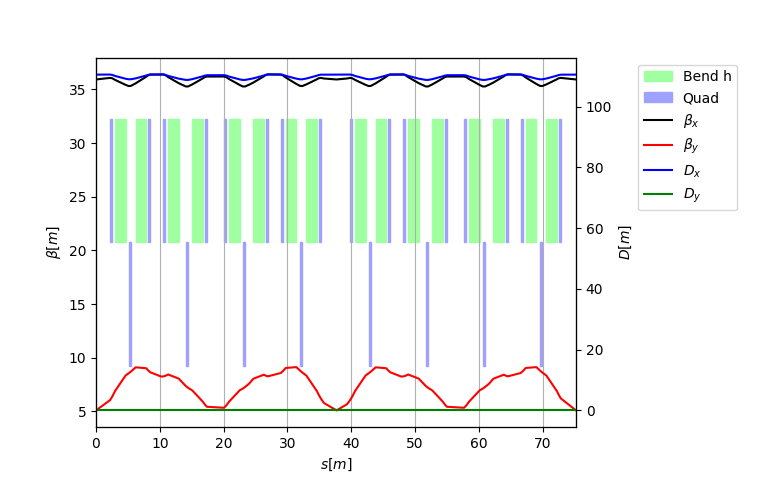

In [20]:
# Optics functions
tw0.plot()

## Control the tunes

In [21]:
opt = line.match(
    solve=False, # <- prepare the match without running it
    method='4d',
    vary=[
        xt.Vary('kqf_common', limits=(0, 1),  step=1e-3),
        xt.Vary('kqd', limits=(-1, 0), step=1e-3),
        
    ],
    targets=[
        xt.TargetSet(qx=1.64, qy=1.72, tol=1e-6, tag='tunes'),
    ]
)

In [22]:
# Inspect situation before the match
opt.target_status()
opt.vary_status()

Target status:               alty = 1.3098e+01              
id state tag   tol_met       residue   current_val    target_val description                         
0  ON    tunes   False      -1.30956      0.330436          1.64 'qx', val=1.64, tol=1e-06, weight=10
1  ON    tunes   False    -0.0267565       1.69324          1.72 'qy', val=1.72, tol=1e-06, weight=10
Vary status:                 
id state tag met name       lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kqf_common           0          0.02           1          0.02         0.001             1
1  ON        OK  kqd                 -1         -0.02           0         -0.02         0.001             1


In [23]:
# Perform ten optimization steps
opt.step(10)

                                             
Optimize - start penalty: 13.1                              
Matching: model call n. 19 penalty = 2.0184e-06              
Optimize - end penalty:  2.01842e-06                            


In [24]:
# Inspect optimization log
opt.log()

Table: 6 rows, 16 cols
iteration                   penalty alpha tag tol_met target_active hit_limits vary_active ...
0                           13.0984    -1     nn      yy            nn         yy         
1                           13.0984    -1     nn      yy            nn         yy         
2                           6.41402     1     nn      yy            nn         yy         
3                          0.656177     0     nn      yy            nn         yy         
4                         0.0121732     0     nn      yy            nn         yy         
5                       2.01842e-06     0     yy      yy            nn         yy         

In [25]:
# Inspect situation after the match
opt.target_status()
opt.vary_status()

Target status:               nalty = 2.0184e-06              
id state tag   tol_met       residue   current_val    target_val description                         
0  ON    tunes    True  -1.68915e-07          1.64          1.64 'qx', val=1.64, tol=1e-06, weight=10
1  ON    tunes    True    1.1049e-07          1.72          1.72 'qy', val=1.72, tol=1e-06, weight=10
Vary status:                 
id state tag met name       lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kqf_common           0      0.407848           1          0.02         0.001             1
1  ON        OK  kqd                 -1     -0.521131           0         -0.02         0.001             1


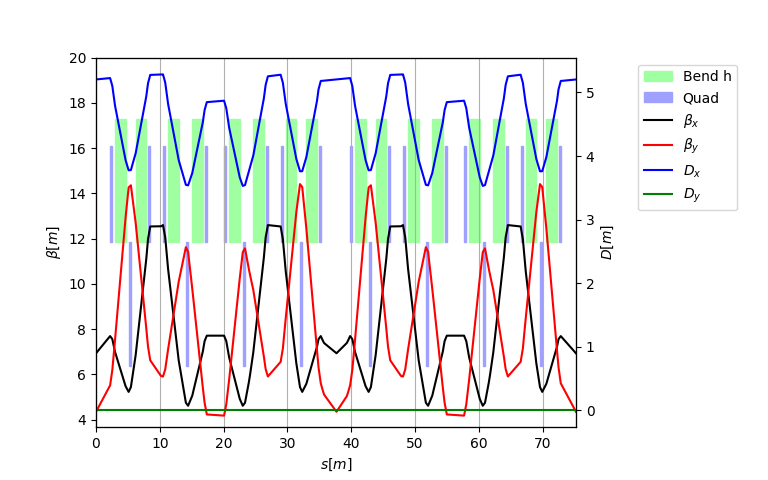

In [26]:
# Twiss again
tw = line.twiss(method='4d')

pl = tw.plot()
pl.ylim(left_hi=20)

### Impose zero dispersion at electrostatic septum

In [27]:
opt = line.match(
    solve=False,
    method='4d',
    vary=[
        xt.VaryList(['kqfa', 'kqfb'], limits=(0, 1),  step=1e-3),
        xt.Vary('kqd', limits=(-1, 0), step=1e-3),        
    ],
    targets=[
        xt.TargetSet(qx=1.663, qy=1.72, tol=1e-6),
        xt.Target(dx=0, at='extr_septum', tol=1e-6)
    ]
)

In [28]:
opt.target_status()
opt.step(20)

Target status:               alty = 5.2041e+01              
id state tag            tol_met       residue   current_val    target_val description                                 
0  ON    qx               False    -0.0230002          1.64         1.663 'qx', val=1.663, tol=1e-06, weight=10       
1  ON    qy                True    1.1049e-07          1.72          1.72 'qy', val=1.72, tol=1e-06, weight=10        
2  ON    extr_septum_dx   False       5.20403       5.20403             0 ('dx', 'extr_septum'), val=0, tol=1e-06, ...
                                             
Optimize - start penalty: 52.04                             
Matching: model call n. 22 penalty = 3.1953e-08              
Optimize - end penalty:  3.19532e-08                            


In [29]:
opt.target_status()
opt.vary_status()

Target status:               nalty = 3.1953e-08              
id state tag            tol_met       residue   current_val    target_val description                                 
0  ON    qx                True  -2.67446e-10         1.663         1.663 'qx', val=1.663, tol=1e-06, weight=10       
1  ON    qy                True    9.0721e-11          1.72          1.72 'qy', val=1.72, tol=1e-06, weight=10        
2  ON    extr_septum_dx    True   3.18282e-09   3.18282e-09             0 ('dx', 'extr_septum'), val=0, tol=1e-06, ...
Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  kqfa           0      0.311895           1      0.407848         0.001             1
1  ON        OK  kqfb           0      0.524803           1      0.407848         0.001             1
2  ON        OK  kqd           -1     -0.523847           0     -0.521131         0.001             1


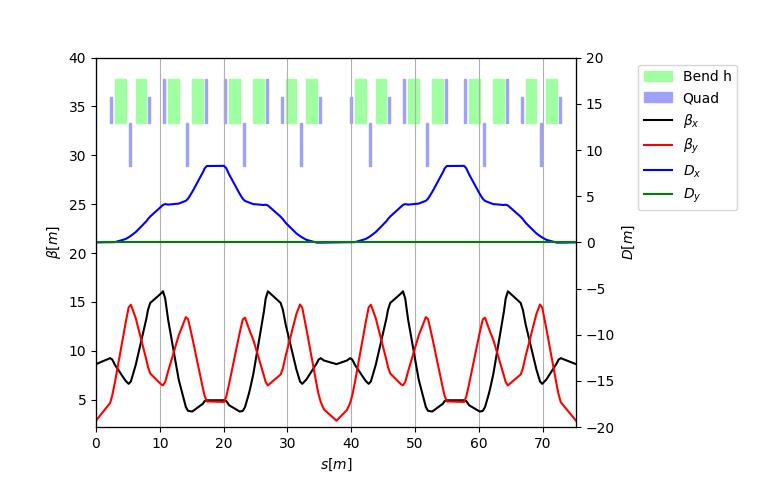

In [30]:
# Twiss again
tw = line.twiss4d()

pl = tw.plot()
pl.ylim(left_hi=40, right_lo=-20, right_hi=20,
        lattice_hi=1.5, lattice_lo=-7)

## Correct chromaticity

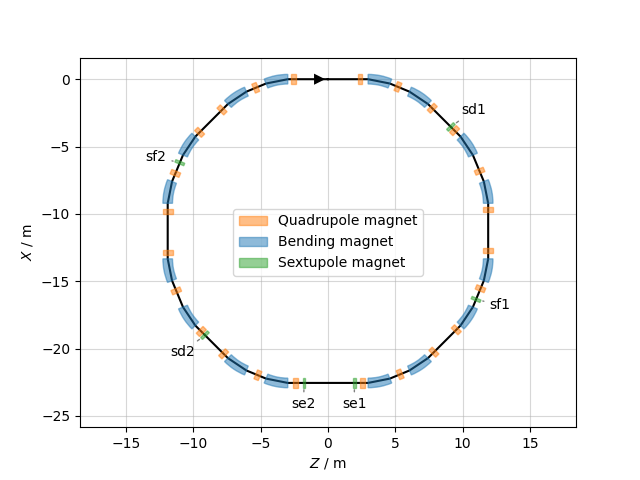

In [31]:
# Label all sextupoles (sf, sd and se)
ttsext = tt.rows[tt.element_type=='Sextupole']
sv.plot(labels=ttsext.name)

In [32]:
# We build a single match with all constraints
# (can be reused to retune the machine)
opt = line.match(
    solve=False,
    method='4d',
    vary=[
        xt.VaryList(['ksf', 'ksd'], step=1e-3),
        xt.VaryList(['kqfa', 'kqfb'], limits=(0, 1),  step=1e-3, tag='qf'),
        xt.Vary('kqd', limits=(-1, 0), step=1e-3, tag='qd'),
    ],
    targets=[
        xt.TargetSet(dqx=-0.1, dqy=-0.1, tol=1e-3, tag="chrom"),
        xt.Target(dx = 0, at='extr_septum', tol=1e-6),
        xt.TargetSet(qx=1.64, qy=1.72, tol=1e-6),
    ]
)
opt.step(20)

                                             
Optimize - start penalty: 1.756                             
Matching: model call n. 15 penalty = 3.4719e-05              
Optimize - end penalty:  3.4719e-05                            


In [33]:
opt.target_status()

Target status:               nalty = 3.4719e-05              
id state tag            tol_met       residue   current_val    target_val description                                 
0  ON    chrom             True   3.36002e-05    -0.0999664          -0.1 'dqx', val=-0.1, tol=0.001, weight=1        
1  ON    chrom             True   2.81095e-06    -0.0999972          -0.1 'dqy', val=-0.1, tol=0.001, weight=1        
2  ON    extr_septum_dx    True  -7.65152e-07  -7.65152e-07             0 ('dx', 'extr_septum'), val=0, tol=1e-06, ...
3  ON    qx                True   3.12104e-07          1.64          1.64 'qx', val=1.64, tol=1e-06, weight=10        
4  ON    qy                True  -4.95233e-08          1.72          1.72 'qy', val=1.72, tol=1e-06, weight=10        


In [34]:
opt.vary_status()

Vary status:                 
id state tag met name lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON        OK  ksf  None              -1.3961 None                    0         0.001             1
1  ON        OK  ksd  None             0.815039 None                    0         0.001             1
2  ON    qf  OK  kqfa 0                 0.30247 1                0.311895         0.001             1
3  ON    qf  OK  kqfb 0                0.523281 1                0.524803         0.001             1
4  ON    qd  OK  kqd  -1              -0.518932 0               -0.523847         0.001             1


### Save machine state

In [35]:
line.to_json('pimms_00_optics.json')